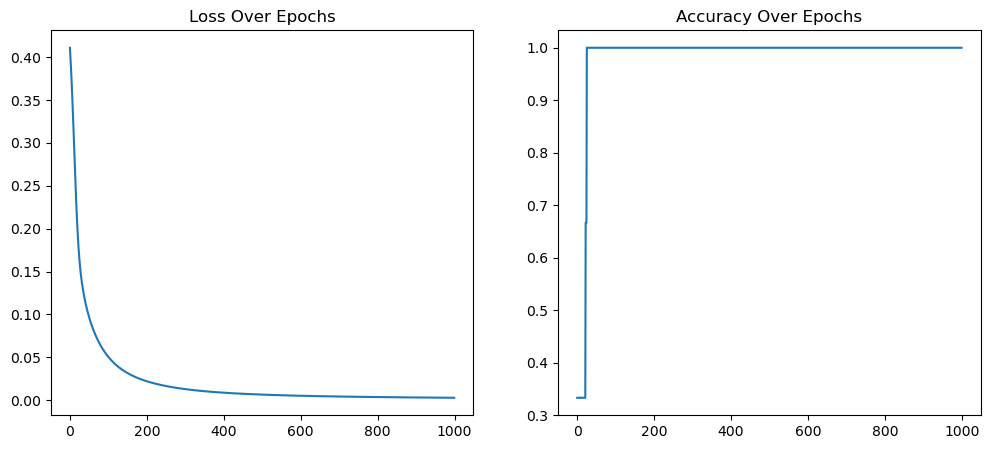

Predicted: A


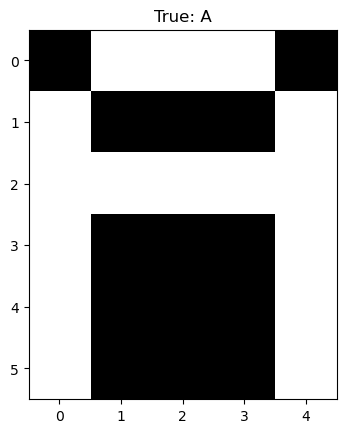

In [2]:
# ================================
# Neural Network from Scratch
# Letters A, B, C Classification
# ================================

import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# 1. Define Input Data (Binary Patterns for A, B, C)
# -------------------------------

# Each letter is a 5x6 grid, flattened into a 30-element array
A = np.array([
    [0,1,1,1,0],
    [1,0,0,0,1],
    [1,1,1,1,1],
    [1,0,0,0,1],
    [1,0,0,0,1],
    [1,0,0,0,1]
]).flatten()

B = np.array([
    [1,1,1,0,0],
    [1,0,0,1,0],
    [1,1,1,0,0],
    [1,0,0,1,0],
    [1,0,0,1,0],
    [1,1,1,0,0]
]).flatten()

C = np.array([
    [0,1,1,1,0],
    [1,0,0,0,1],
    [1,0,0,0,0],
    [1,0,0,0,0],
    [1,0,0,0,1],
    [0,1,1,1,0]
]).flatten()

X = np.array([A, B, C])   # Input dataset
y = np.array([[1,0,0],    # A
              [0,1,0],    # B
              [0,0,1]])   # C

# Normalize data (optional since binary, but helps training)
X = X / np.max(X)

# -------------------------------
# 2. Helper Functions
# -------------------------------

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def one_hot_to_label(y):
    return np.argmax(y)

# -------------------------------
# 3. Neural Network Architecture
# -------------------------------
input_size = X.shape[1]   # 30 pixels
hidden_size = 10          # adjustable
output_size = 3           # A, B, C
epochs = 1000
learning_rate = 0.1

# Weight initialization
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

losses = []
accuracies = []

# -------------------------------
# 4. Training Loop
# -------------------------------
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Compute loss (Mean Squared Error for simplicity)
    loss = np.mean((y - a2) ** 2)
    losses.append(loss)

    # Accuracy
    predictions = np.argmax(a2, axis=1)
    targets = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == targets)
    accuracies.append(accuracy)

    # Backpropagation
    error_output = y - a2
    d_output = error_output * sigmoid_derivative(a2)

    error_hidden = np.dot(d_output, W2.T)
    d_hidden = error_hidden * sigmoid_derivative(a1)

    # Weight updates
    W2 += np.dot(a1.T, d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    W1 += np.dot(X.T, d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

# -------------------------------
# 5. Plot Training Performance
# -------------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(losses)
plt.title("Loss Over Epochs")

plt.subplot(1,2,2)
plt.plot(accuracies)
plt.title("Accuracy Over Epochs")
plt.show()

# -------------------------------
# 6. Test Prediction
# -------------------------------
test_index = 0  # change to 1 or 2 to test B, C
test_input = X[test_index].reshape(1, -1)

z1 = np.dot(test_input, W1) + b1
a1 = sigmoid(z1)
z2 = np.dot(a1, W2) + b2
output = sigmoid(z2)

predicted_label = np.argmax(output)

print(f"Predicted: {['A','B','C'][predicted_label]}")

# Display the image
plt.imshow(X[test_index].reshape(6,5), cmap="gray")
plt.title(f"True: {['A','B','C'][test_index]}")
plt.show()
